In [29]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

In [30]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\plot madrid\all_Madrid.xlsx"

xl= pd.ExcelFile(file)      # Load spreadsheet
df = xl.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df.index  = np.arange(len(df))
#df=df.iloc[:, [2,33,34,42,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208]]

In [31]:
v=[]
for i in df['mod']:
    if math.isnan(i) is True:
        v.append('-')
    elif i==1:
        v.append('No information')
    elif i==2:
        v.append('Congestion and pollution')
    elif i==3:
        v.append('Public services')
    elif i==4:
        v.append('Redistribution')
df.insert(loc=1, column='Treatment', value=v)
#df.drop(['mod'], inplace=True, axis=1)
df=df.rename(columns={"player.HH": "High EE High NE","player.HL": "High EE Low NE", "player.LH": "Low EE High NE","player.LL": "Low EE Low NE"})

In [32]:
v=[]
for i in df['player.trip_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    else:
        v.append('Public transport')
df.insert(loc=4, column='Trip_chosen_mode', value=v)

In [33]:
v=[]
for i in df['player.trip_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    elif (i==5 or i==6 or i==7 or i==10):
        v.append('Light transport')
    else:
        v.append('Public transport')
df.insert(loc=5, column='Trip_mode', value=v)

In [34]:
v=[]
for i in df['player.trip_alternative_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    elif (i==5 or i==6 or i==7 or i==10):
        v.append('Light transport')
    else:
        v.append('Public transport')
df.insert(loc=7, column='Trip_alt_mode', value=v)

In [35]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Treatment,participant.id_in_session,mod,Trip_chosen_mode,Trip_mode,participant.code,Trip_alt_mode,participant.time_started,player.inequality_perception,What type of society do you think is Spain today – which diagram comes the closest?,player.inequality_wish,What do you think Spain ought to be like – which would you prefer?,player.income_distribution,How fair do you think the wealth distribution is in your country?,player.postal_code,participant._municipality,The participant lives in Madrid:,player.driving_license,Do you have a driver license?,player.access_to_car,Do you own or have access to a car?,player.car_type,What kind of vehicle do you have access to? If you have access to multiple vehicles choose the one you use the most.,player.access_to_bike,Do you own or have access to a bike (electric or regular)?,player.access_to_motorbyke,Do you own or have access to a motorbyke?,player.access_to_scooter,Do you own or have access to a e-scooter?,player.employ_status,What is your employment status?,player.trip_destination,player.trip_purpose,What is the purpose/destination of this trip?,player.trip_other,player.trip_moment,At what time of the day do you typically travel?,player.trip_mode,By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.,player.mode_other,player.trip_traffic,How are the traffic conditions normally on the trip?,player.trip_time,What is the approximate travel time of this trip (one way)?,player.trip_cost,"What is the approximate cost of this trip (fuel, road tolls, parking, ticket price etc.), one way? If you are traveling by public transport and have a period ticket, please consider the average price per trip.",player.trip_alternative_mode,"If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?",player.trip_alternative_rate,How would you rate your alternative?,player.trip_alternative_justification,player.control_question,Answer to control question:,player.alternative1,Alternative 1,player.alternative2,Alternative 2,player.alternative3,Alternative 3,player.alternative4,Alternative 4,player.alternative5,Alternative 5,1_policy_choice,1_What is your preferred policy type?,1_Price_UR_A,"1_A_Price in urban areas, rush hour",1_Price_UN_A,"1_A_Price in urban areas, outside rush hour",1_Price_O_A,1_A_Price outside urban areas,1_EV_A,1_A_Price for electric vehicles,1_Revenue_A,1_A_Use of revenue,1_Price_UR_B,"1_B_Price in urban areas, rush hour",1_Price_UN_B,"1_B_Price in urban areas, outside rush hour",1_Price_O_B,1_B_Price outside urban areas,1_EV_B,1_B_Price for electric vehicles,1_Revenue_B,1_B_Use of revenue,2_policy_choice,2_What is your preferred policy type?,2_Price_UR_A,"2_A_Price in urban areas, rush hour",2_Price_UN_A,"2_A_Price in urban areas, outside rush hour",2_Price_O_A,2_A_Price outside urban areas,2_EV_A,2_A_Price for electric vehicles,2_Revenue_A,2_A_Use of revenue,2_Price_UR_B,"2_B_Price in urban areas, rush hour",2_Price_UN_B,"2_B_Price in urban areas, outside rush hour",2_Price_O_B,2_B_Price outside urban areas,2_EV_B,2_B_Price for electric vehicles,2_Revenue_B,2_B_Use of revenue,3_policy_choice,3_What is your preferred policy type?,3_Price_UR_A,"3_A_Price in urban areas, rush hour",3_Price_UN_A,"3_A_Price in urban areas, outside rush hour",3_Price_O_A,3_A_Price outside urban areas,3_EV_A,3_A_Price for electric vehicles,3_Revenue_A,3_A_Use of revenue,3_Price_UR_B,"3_B_Price in urban areas, rush hour",3_Price_UN_B,"3_B_Price in urban areas, outside rush hour",3_Price_O_B,3_B_Price outside urban areas,3_EV_B,3_B_Price for electric vehicles,3_Revenue_B,3_B_Use of revenue,4_policy_choice,4_What is your preferred policy type?,4_Price_UR_A,"4_A_Price in urban areas, rush hour",4_Price_UN_A,"4_A_Price in urban areas, outside rush hour",4_Price_O_A,4_A_Price outside urban areas,4_EV_A,4_A_Price for electric vehicles,4_Revenue_A,4_A_Use of revenue,4_Pri

In [36]:
a=df
b=df

for i in range(len(a)):
    if a['Trip_chosen_mode'][i]!='Car':
        a=a.drop(i)
#a.index  = np.arange(len(a))
for i in range(len(b)):
    if b['Trip_chosen_mode'][i]!='Public transport':
        b=b.drop(i)
#b.index  = np.arange(len(b))

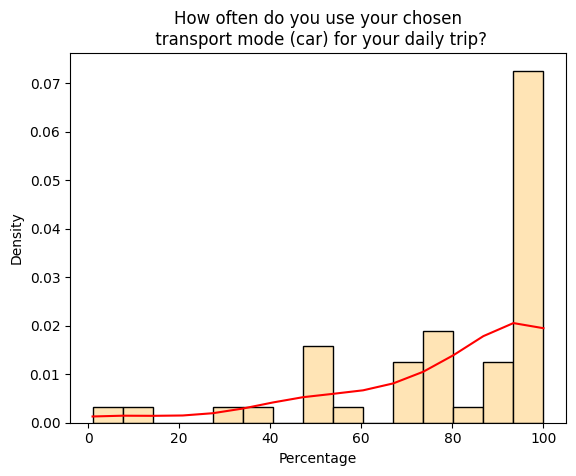

In [42]:
column= 'player.my_trip'
dens_a = stats.gaussian_kde(a['player.my_trip'])
n, x_a, _ = plt.hist((a['player.my_trip']),bins=15, density=True, label='Set B', color='moccasin', edgecolor='black')
plt.plot(x_a,dens_a(x_a) ,color='r')
#a.groupby([column]).count().plot(kind='bar', y=1, title='', figsize=(4,3),color='moccasin', edgecolor='k', legend=False)
plt.title('How often do you use your chosen\n transport mode (car) for your daily trip?')
plt.xlabel('Percentage')
plt.ylabel('Density')
#plt.tight_layout(pad=2, w_pad=8, h_pad=2)
#plt.savefig('my_trip_car_madrid.png')
plt.show()

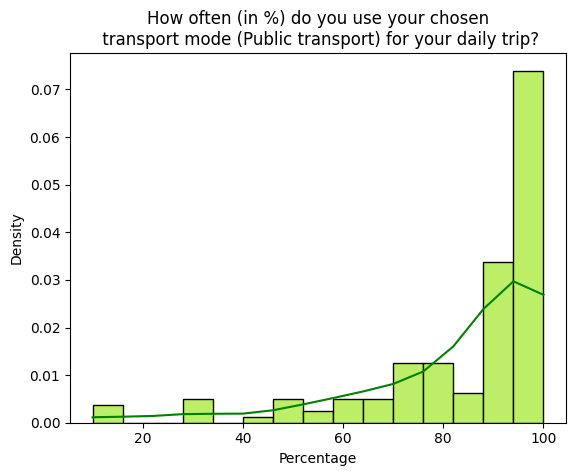

In [43]:
column= 'player.my_trip'
dens_b = stats.gaussian_kde(b['player.my_trip'])
n, x_b, _ = plt.hist((b['player.my_trip']),bins=15, density=True, label='Set B', color='#BCEE68', edgecolor='black')
plt.plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
#a.groupby([column]).count().plot(kind='bar', y=1, title='', figsize=(7,5),color='moccasin', edgecolor='k', legend=False)
plt.title('How often (in %) do you use your chosen\n transport mode (Public transport) for your daily trip?')
plt.xlabel('Percentage')
plt.ylabel('Density')
#plt.tight_layout(pad=2, w_pad=8, h_pad=2)
#plt.savefig('my_trip_public_madrid.png')
plt.show()

In [44]:
a=df
b=df

for i in range(len(a)):
    if a['player.SN_car_A'][i]!=1:
        a=a.drop(i)
#a.index  = np.arange(len(a))
for i in range(len(b)):
    if b['player.SN_car_A'][i]!=0:
        b=b.drop(i)
#b.index  = np.arange(len(b))

b[['player.EE','player.PNB','player.NE',"High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"]]=b[['player.EE','player.PNB','player.NE',"High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"]].apply(lambda x: 100-x)
z=pd.concat([a, b], axis=0).sort_index(axis=0)

In [45]:
z1=pd.melt(z, id_vars=['Treatment','player.SN_car_A','Trip_chosen_mode'], value_vars=["High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"],var_name='Expectations', value_name='Conditional choice')

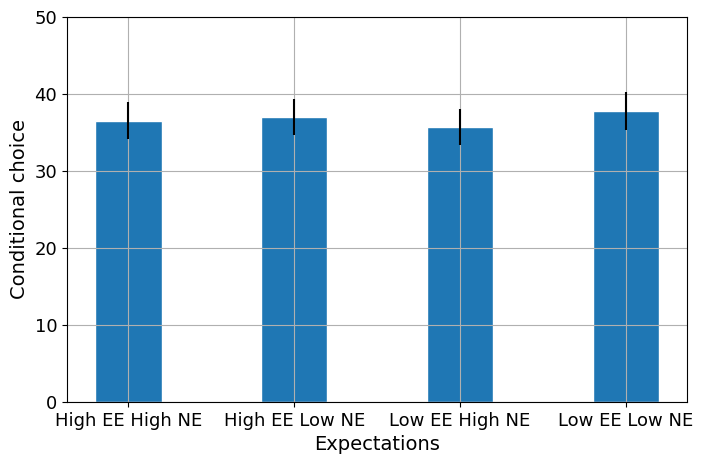

In [54]:
v=[]
errorv=[]

for i in ["High EE High NE","High EE Low NE","Low EE High NE","Low EE Low NE"]:
    v=np.append(v,z[i].mean())
    errorv=np.append(errorv,z[i].std()/(np.sqrt(len(z[i]))))

fig=plt.figure(figsize=(8,5))
barWidth = 0.5

ind = np.arange(4) 
width = 0.4

plt.bar(ind, v, yerr=errorv, width=width,edgecolor='white')

plt.xticks([r for r in range(4)], ["High EE High NE","High EE Low NE","Low EE High NE","Low EE Low NE"], fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Expectations', fontsize=14)
plt.ylabel('Conditional choice', fontsize=14)
plt.ylim([0,50])
#plt.tight_layout(pad=2,w_pad=8, h_pad=3)
plt.grid()
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\cond_choice_tot.png')
plt.show()

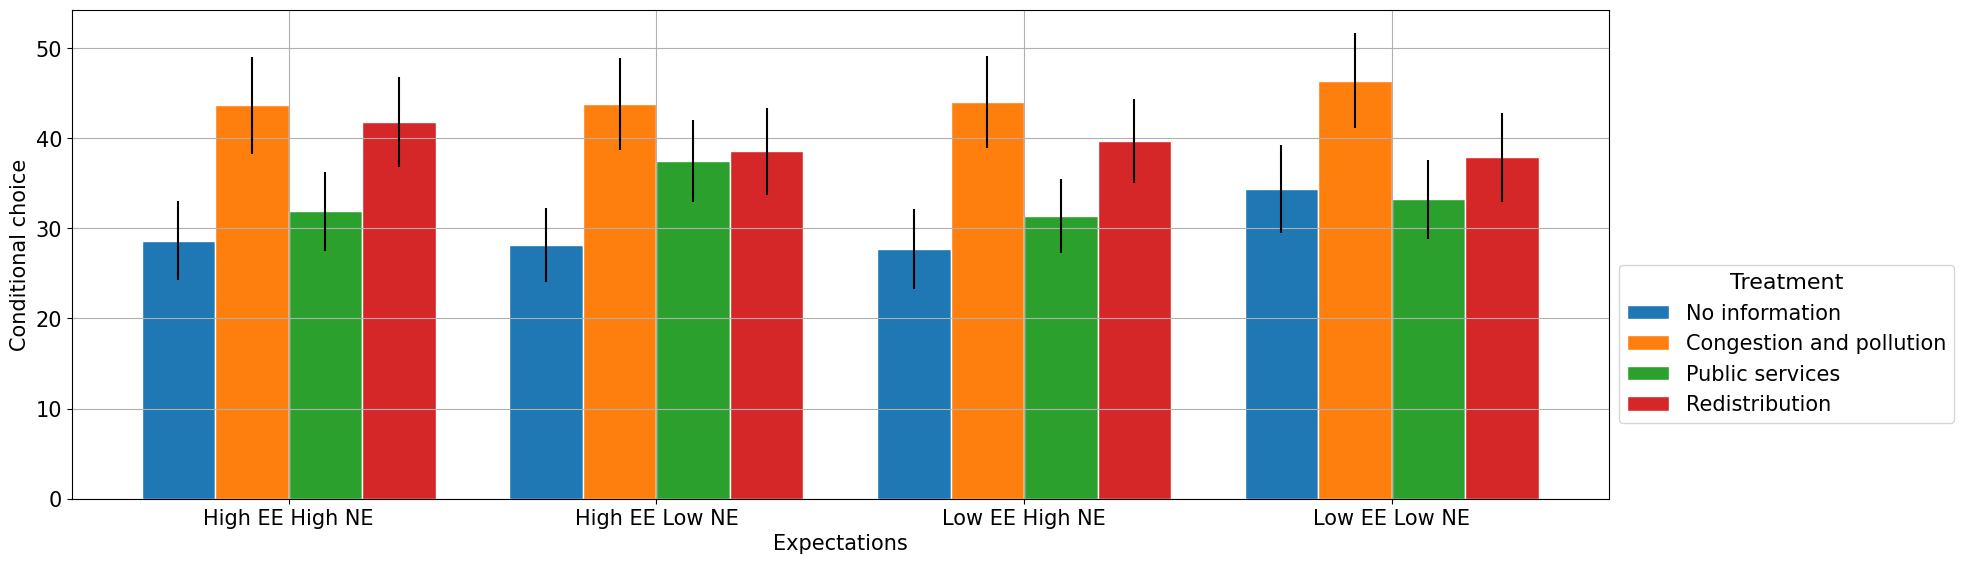

In [55]:
v=[]
w=[]
h=[]
l=[]
errorv=[]
errorw=[]
errorh=[]
errorl=[]
for i in ["High EE High NE","High EE Low NE","Low EE High NE","Low EE Low NE"]:
    v=np.append(v,z[z['Treatment']=='No information'][i].mean())
    w=np.append(w,z[z['Treatment']=='Congestion and pollution'][i].mean())
    h=np.append(h,z[z['Treatment']=='Public services'][i].mean())
    l=np.append(l,z[z['Treatment']=='Redistribution'][i].mean())
    errorv=np.append(errorv,z[z['Treatment']=='No information'][i].std()/(np.sqrt(len(z[z['Treatment']=='No information'][i]))))
    errorw=np.append(errorw,z[z['Treatment']=='Congestion and pollution'][i].std()/(np.sqrt(len(z[z['Treatment']=='Congestion and pollution'][i]))))
    errorh=np.append(errorh,z[z['Treatment']=='Public services'][i].std()/(np.sqrt(len(z[z['Treatment']=='Public services'][i]))))
    errorl=np.append(errorl,z[z['Treatment']=='Redistribution'][i].std()/(np.sqrt(len(z[z['Treatment']=='Redistribution'][i]))))

fig=plt.figure(figsize=(20,6))
barWidth = 0.2

ind = np.arange(4) 
width = 0.2

plt.bar(ind, v, yerr=errorv, width=width,edgecolor='white', label='No information')
plt.bar(ind+width, w,yerr=errorw,  width=width, edgecolor='white', label='Congestion and pollution')
plt.bar(ind+2*width, h, yerr=errorh, width=width, edgecolor='white', label='Public services')
plt.bar(ind+3*width, l,yerr=errorl,  width=width, edgecolor='white', label='Redistribution')

plt.xticks([r + barWidth*3/2 for r in range(4)], ["High EE High NE","High EE Low NE","Low EE High NE","Low EE Low NE"], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Expectations', fontsize=15)
plt.ylabel('Conditional choice', fontsize=15)
#plt.ylim([0,1])
leg=plt.legend(loc='best', bbox_to_anchor=(1, 0.5),fontsize=15)
leg.set_title('Treatment',prop={'size':16})
plt.tight_layout(pad=2,w_pad=8, h_pad=3)
plt.grid()
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\cond_choice.png')
plt.show()

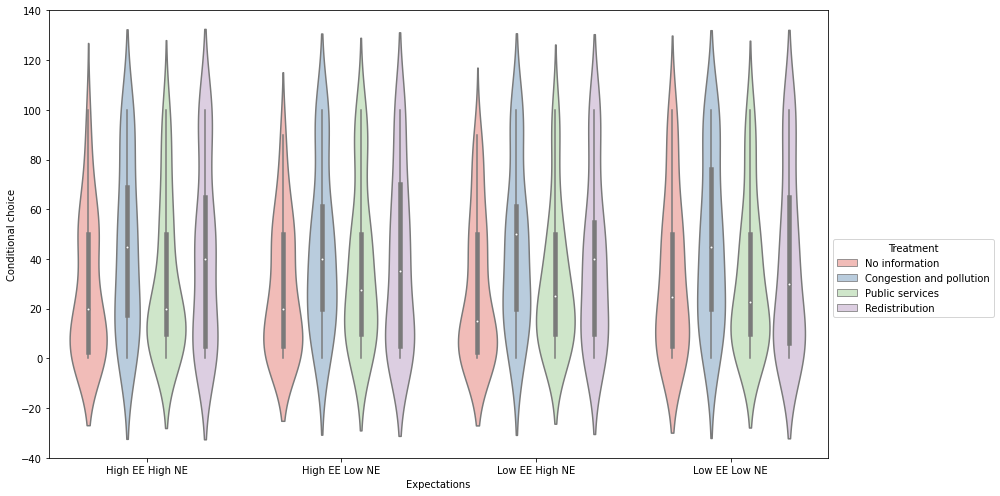

In [15]:
plt.figure(figsize=(14,7))
sns.violinplot(x="Expectations", y="Conditional choice", hue="Treatment" , hue_order= ['No information', 'Congestion and pollution','Public services','Redistribution'], data=z1, palette="Pastel1")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Treatment')
plt.ylim([-40,140])
plt.tight_layout()
#plt.savefig('violin_madrid.png')

In [56]:
df1=df
df2=df
df3=df
df4=df

for i in range(len(df)):
    if df1['mod'][i]!=1:
        df1=df1.drop(i)
    if df2['mod'][i]!=2:
        df2=df2.drop(i)
    if df3['mod'][i]!=3:
        df3=df3.drop(i)
    if df4['mod'][i]!=4:
        df4=df4.drop(i)
df1.index  = np.arange(len(df1))
df2.index  = np.arange(len(df2))
df3.index  = np.arange(len(df3))
df4.index  = np.arange(len(df4))

a=[df1,df2,df3,df4]
b=[df1,df2,df3,df4]
for k in range(4):
    for i in range(len(a[k])):
        if a[k]['player.SN_car_A'][i]!=1:
            a[k]=a[k].drop(i)
    a[k].index  = np.arange(len(a[k]))
    for i in range(len(b[k])):
        if b[k]['player.SN_car_A'][i]!=0:
            b[k]=b[k].drop(i)
    b[k].index  = np.arange(len(b[k]))
    
for k in range(4):
    b[k][['player.EE','player.PNB','player.NE',"High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"]]=b[k][['player.EE','player.PNB','player.NE',"High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"]].apply(lambda x: 100-x)

In [57]:
#nn=df.groupby(['Trip_mode','Trip_alt_mode'])
#chord=nn.size().reset_index(name="Time")
#chord.to_excel("ch_madd.xlsx")

In [59]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\plot madrid\all_Madrid.xlsx"

xl= pd.ExcelFile(file)      # Load spreadsheet
df = xl.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df.index  = np.arange(len(df))
df=df.iloc[:, [202,204,206,208]]

pd.set_option('display.max_columns', None)
df

,player.HH,player.HL,player.LH,player.LL
0,100,100,100,100
1,75,75,75,75
2,1,1,2,20
3,25,25,25,25
4,5,5,5,5
...,...,...,...,...
176,70,80,80,90
177,45,60,35,90
178,95,95,95,95
179,95,95,95,95
